# **Project On : End To End Machine Learning**
---
# **Project Type : Classification**
---
# **Project Topic : TRAIN HEALTH INSURANCE CROSS SELL PREDICTION**

### **Business Context**

- Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

- Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

- Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

- Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

---
## **Dataset Description**
---
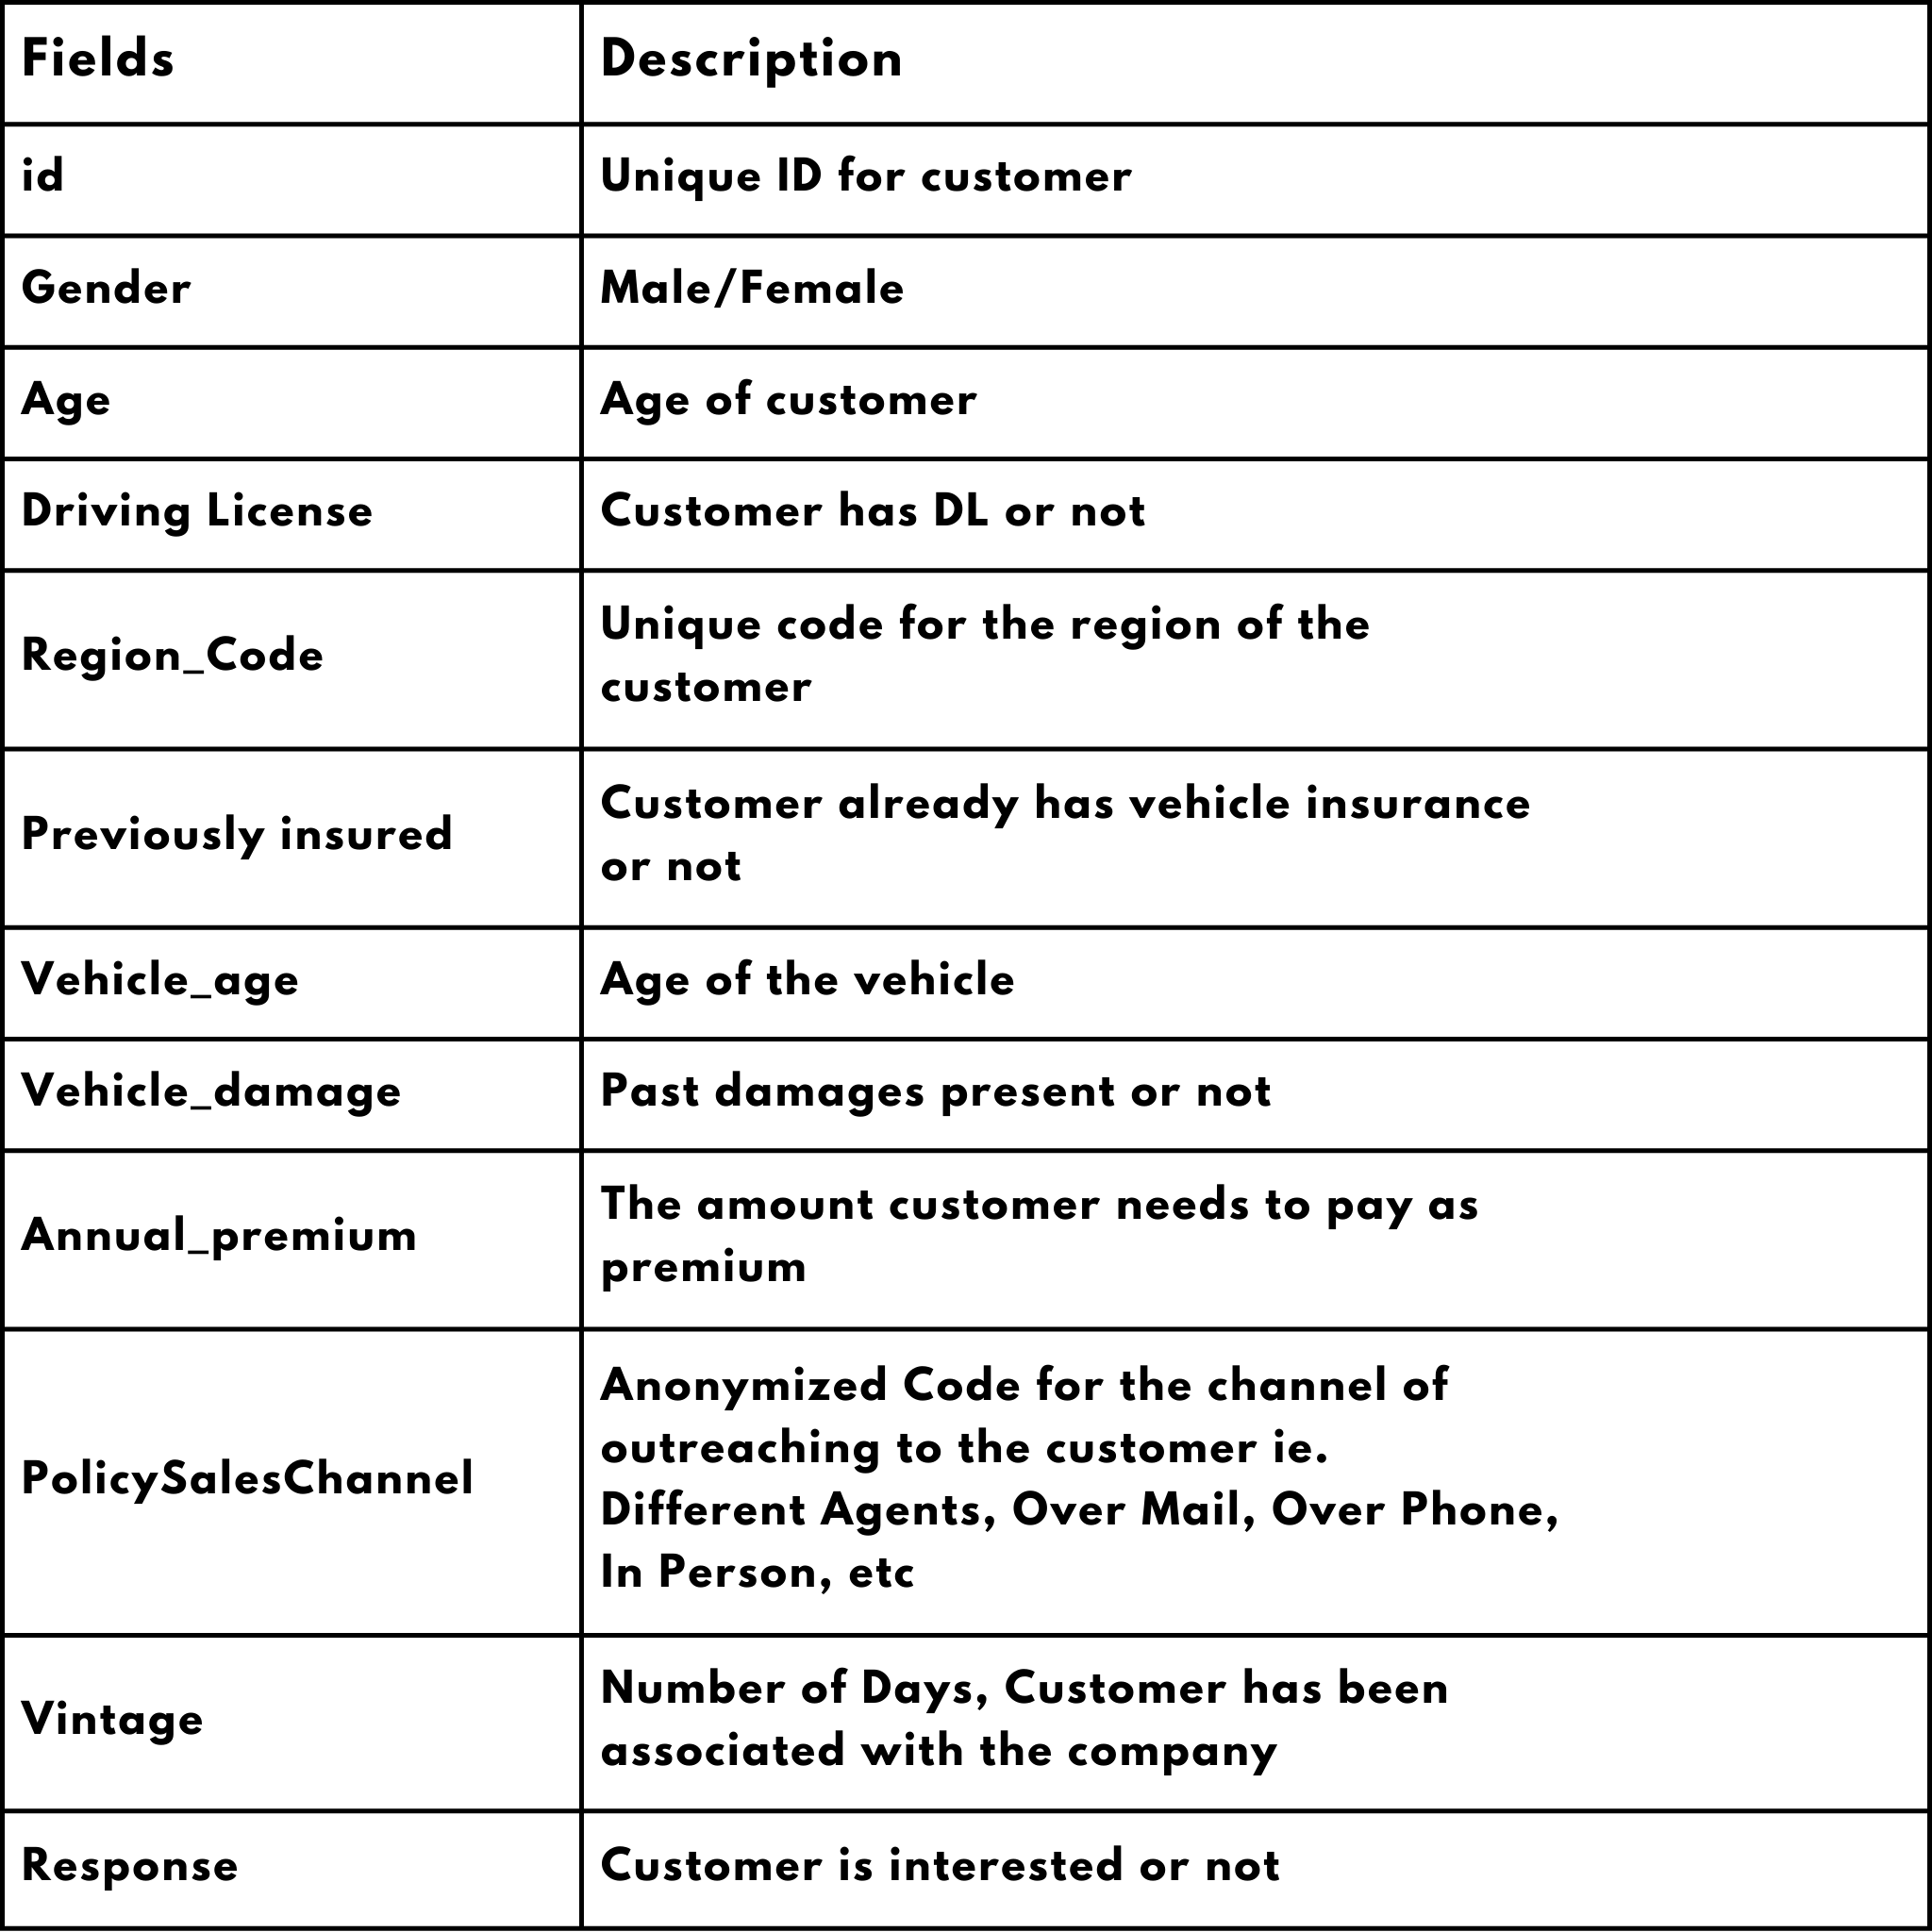

# Health Insurance Cross Sell Prediction

**Predict Health Insurance Owners' who will be interested in Vehicle Insurance**

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# 1. Prepare the problem

### Importing  Required Libreries

In [2]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

### Load Dataset

In [78]:
isp=pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

# 2. Summarize Data

In [4]:
#showing first 5 rows
isp.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# showing last 5 rows
isp.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# check isptypes, shape,null values
print(isp.info())
print()
print(isp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

**Dataset has 381109 rows and 12 columns.**
**There is no missing values present in Dataset.**


### Descriptive statistics

In [7]:
#Statistical Summary of Numeric Variables
isp.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Data visualizations

##### Target Variable

<Axes: xlabel='Response', ylabel='count'>

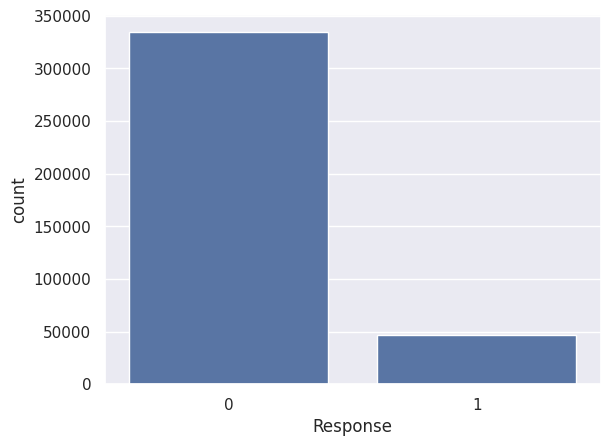

In [79]:
sns.set_theme(style="darkgrid")

sns.countplot(x='Response', data=isp)

* The Data is highly imbalanced.

##### Gender

<ipython-input-13-2a6d405a46fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=isp, palette='husl')


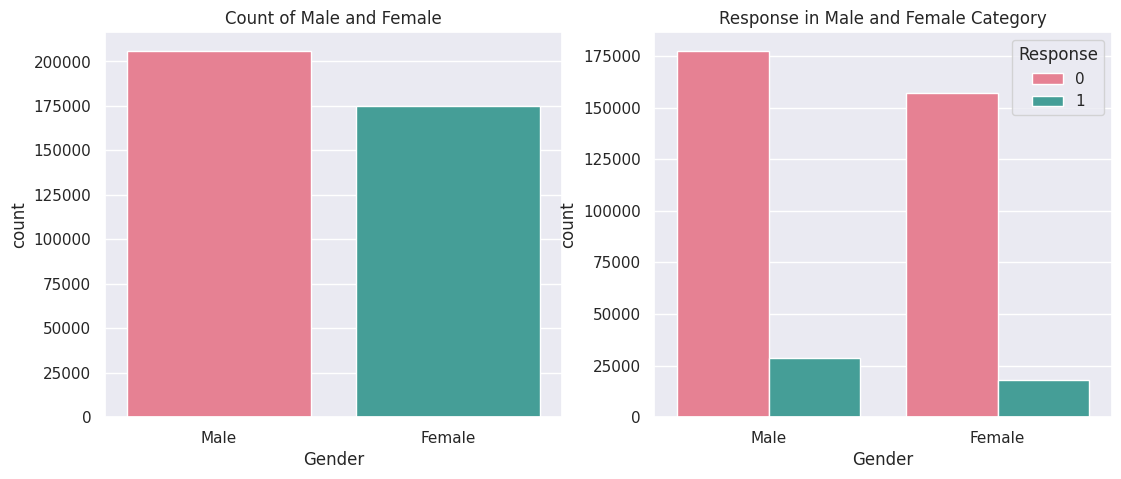

In [13]:
plt.figure(figsize=(13, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=isp, palette='husl')
plt.title("Count of Male and Female")

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Response', data=isp, palette='husl')
plt.title("Response in Male and Female Category")

plt.show()

* The gender variable in the Dataset is almost equally distributed.
* Male category is slightly greater than that of female and chances of buying the insurance is also little high.

##### Age Vs Response

<Axes: xlabel='Age', ylabel='count'>

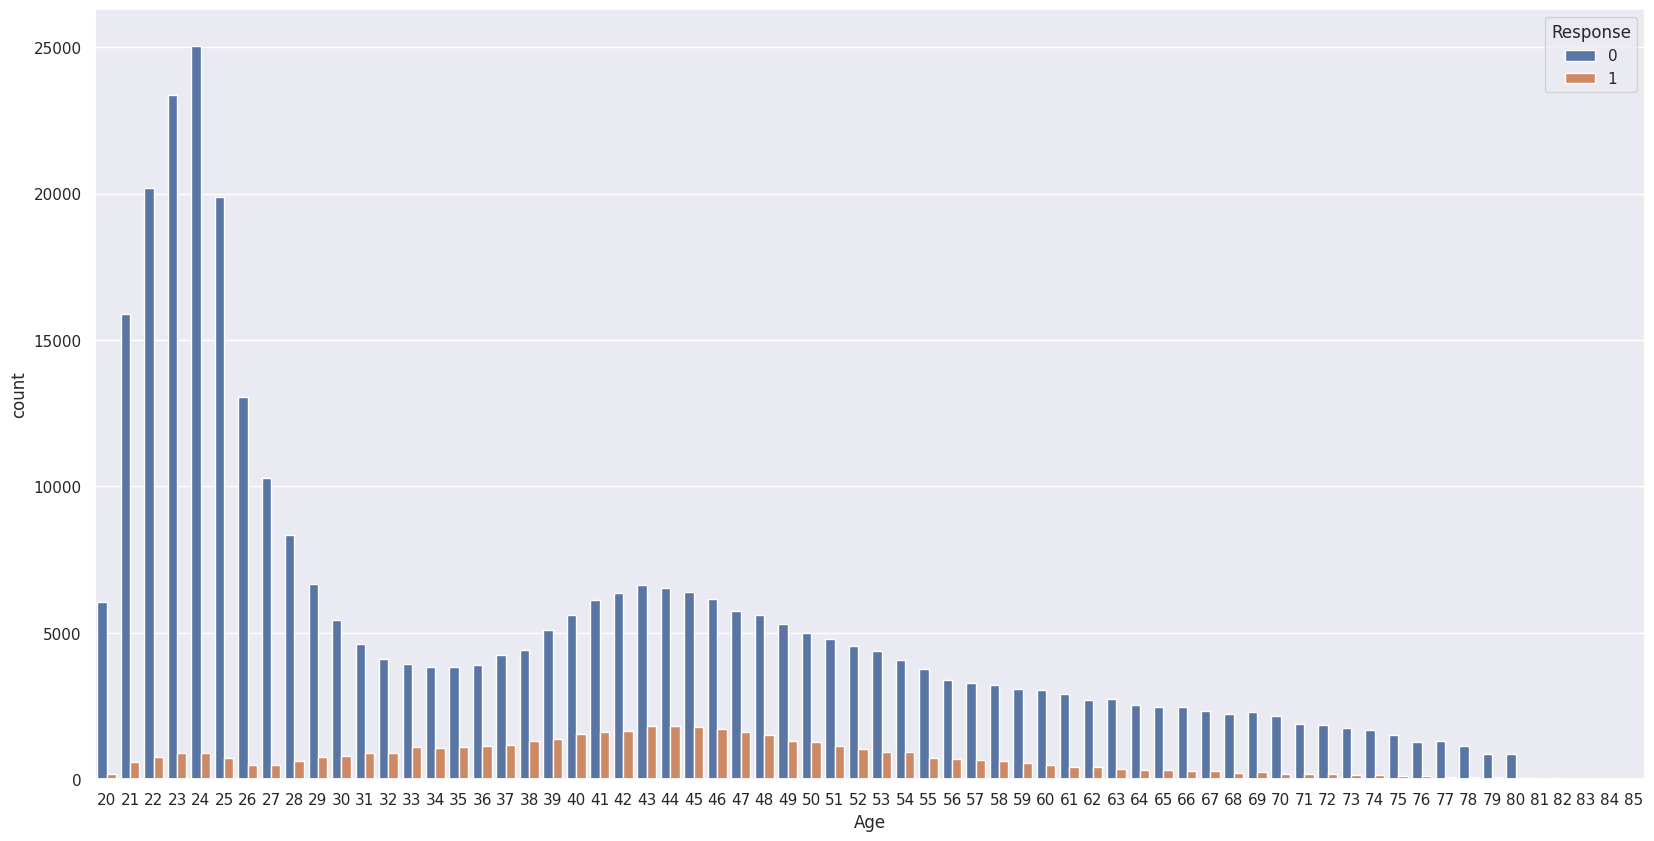

In [15]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=isp)

<Axes: ylabel='Age'>

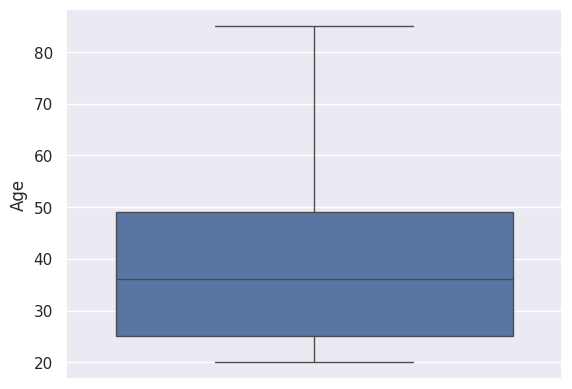

In [16]:
sns.boxplot(isp['Age'])

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the Data.

#### Driving License

<Axes: xlabel='Driving_License', ylabel='count'>

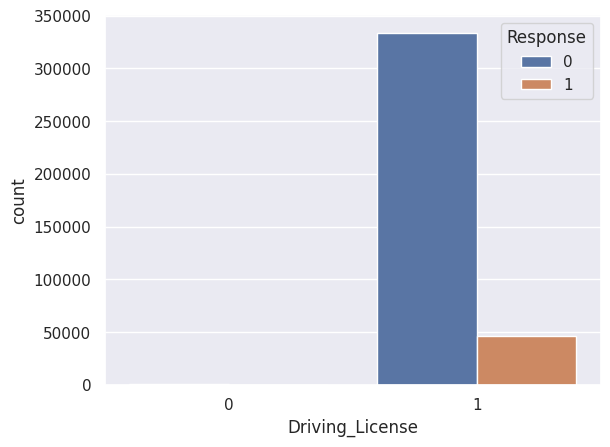

In [18]:
sns.countplot(x='Driving_License', hue='Response', data=isp)

* Customers who are interested in Vehicle Insurance almost all have driving license

##### Previously_Insured Vs Response

<Axes: xlabel='Previously_Insured', ylabel='count'>

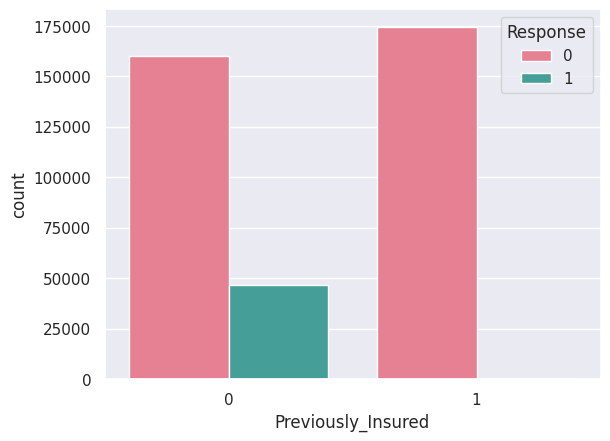

In [19]:
sns.countplot(x='Previously_Insured', hue='Response', data=isp , palette='husl')

* Customer who are not perviosly insured are likely to be inetrested

##### Vehicle_Age Vs Response

<Axes: xlabel='Vehicle_Age', ylabel='count'>

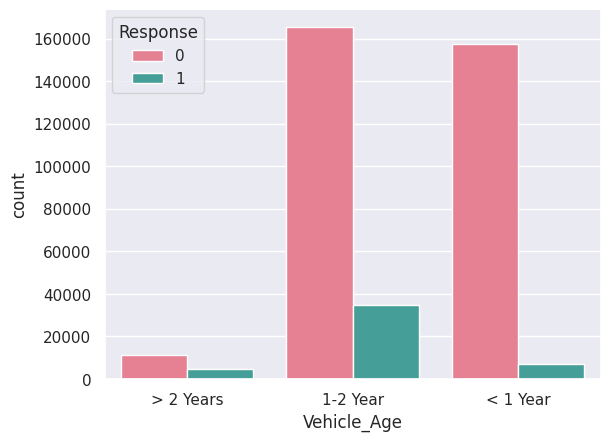

In [20]:
sns.countplot(x='Vehicle_Age',hue='Response', data=isp , palette='husl')

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

##### Annual_Premium


<ipython-input-37-ab6495f34436>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(isp['Annual_Premium'], color='green')


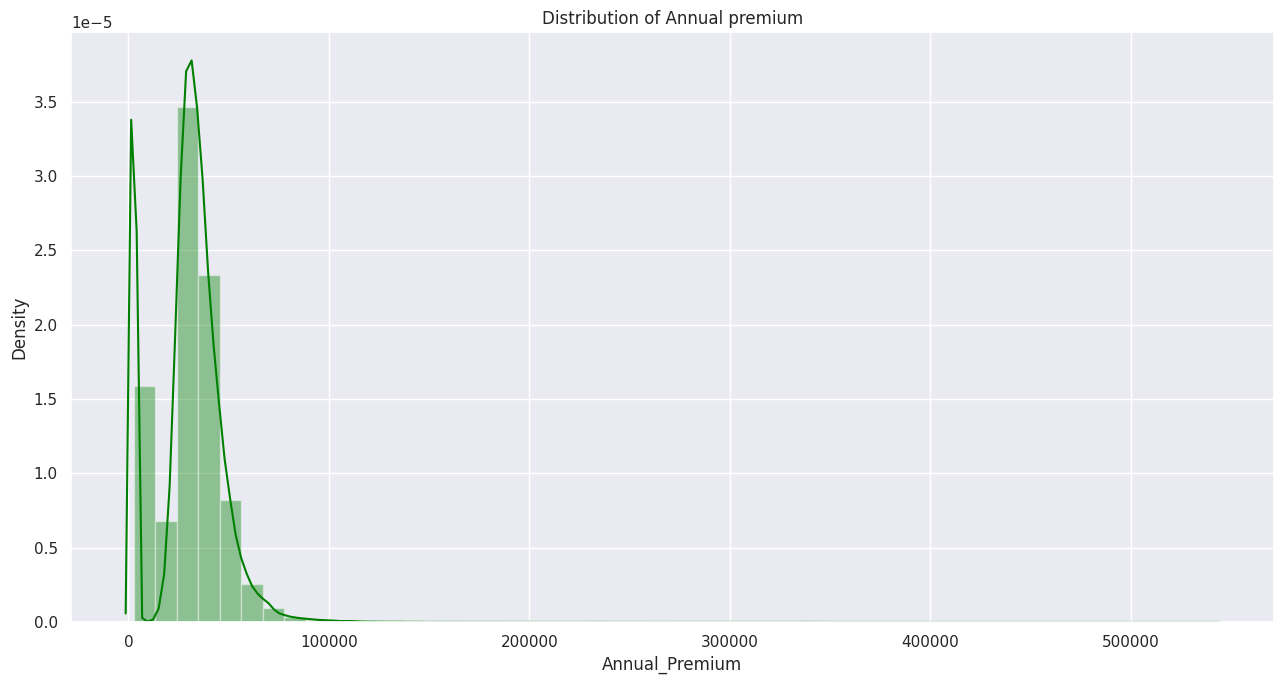

In [37]:
plt.figure(figsize=(13, 7))

sns.distplot(isp['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.tight_layout()
plt.show()


* From the distribution plot we can infer that the annual premimum variable is right skewed

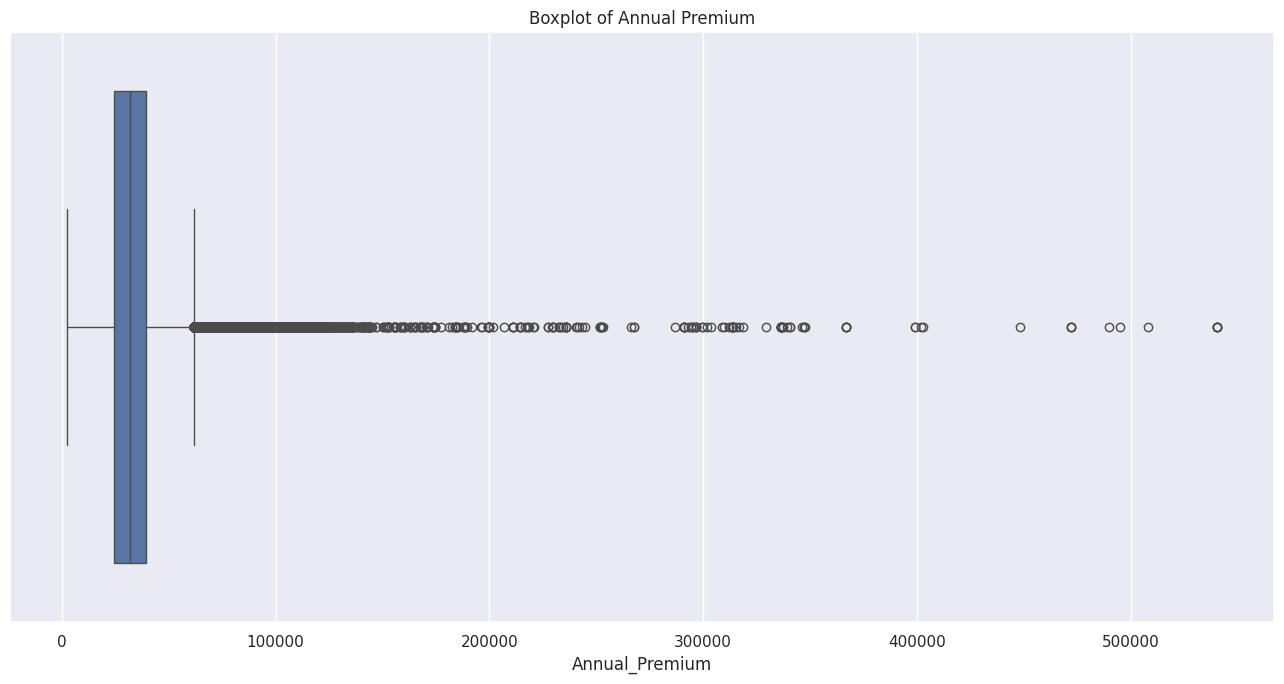

In [36]:
plt.figure(figsize=(13, 7))
sns.boxplot(x=isp['Annual_Premium'])
plt.title("Boxplot of Annual Premium")

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

* From the boxplot we can observe lot of outliers in the variable

##### Correlation Matrix

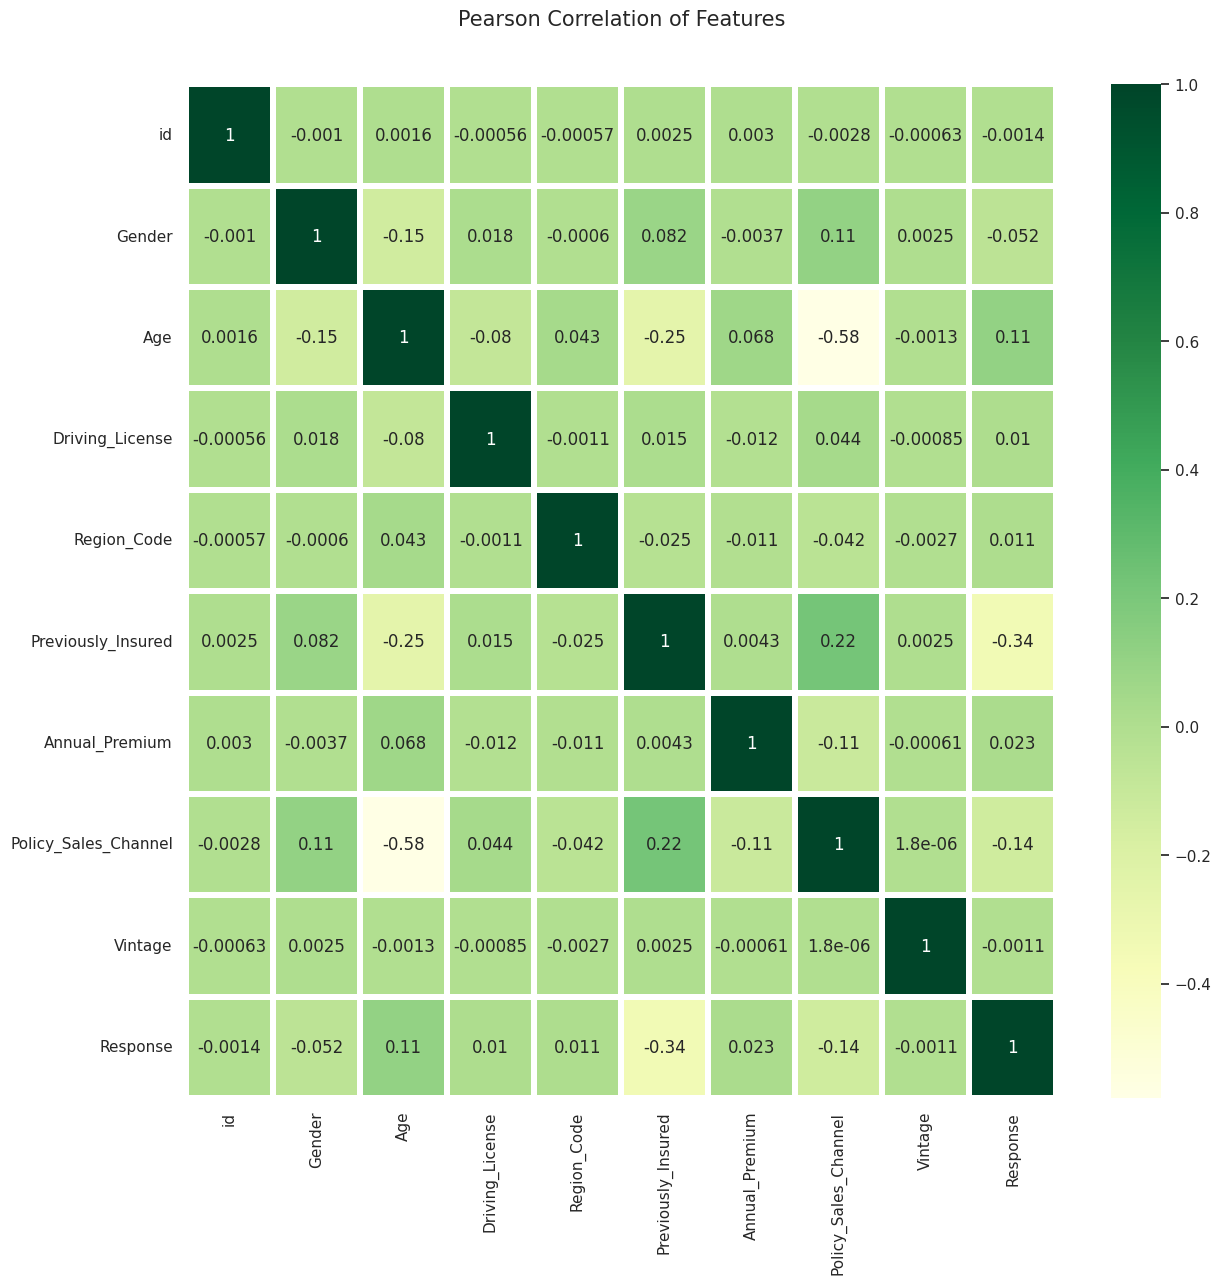

In [45]:
# Filter out non-numeric columns
numeric_data = isp.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corr, ax=ax, annot=True, linewidths=3, cmap='YlGn')
plt.title("Pearson Correlation of Features", y=1.05, size=15)
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

*  Target variable is not much affected by Vintage variable. we can drop least correlated variable.

# 3. Prepare Data

##### Label encoding

In [46]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
isp['Gender'] = labelEncoder.fit_transform(isp['Gender'])
isp['Vehicle_Age'] = labelEncoder.fit_transform(isp['Vehicle_Age'])
isp['Vehicle_Damage'] = labelEncoder.fit_transform(isp['Vehicle_Damage'])

In [47]:
isp.dtypes

,0
id,int64
Gender,int64
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,int64
Vehicle_Damage,int64
Annual_Premium,float64
Policy_Sales_Channel,float64


##### Checking duplicate rows

In [48]:
duplicate=isp[isp.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


* there is no duplicated rows in the Dataset

###### Seprating dependent and independent variables

In [49]:
x=isp.drop(['Response'],axis=1) #contain all  independent variable
y=isp['Response']           #dependent variable

#### Feature Selection

[0.1934361  0.00566389 0.13842409 0.00046325 0.09484266 0.04941624
 0.01633601 0.08096094 0.16327415 0.07046151 0.18672115]


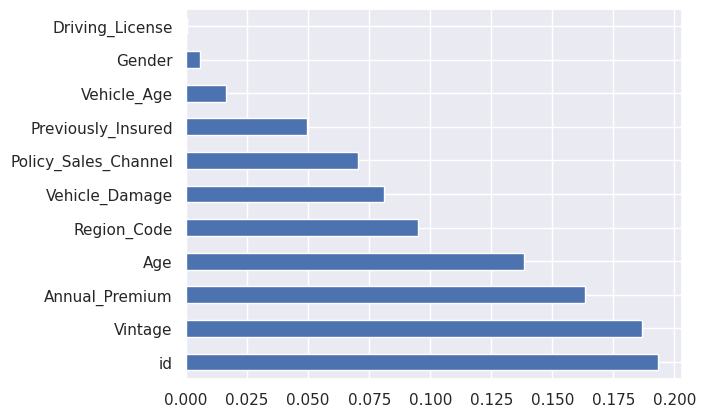

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

* We can remove less important features from the Dataset

In [51]:
x=x.drop(['Driving_License','Gender'],axis=1)

#### Handling Imbalanced Data
*  When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the Dataset. Solving this issue we use resampling technique.

Original Dataset shape Counter({0: 334399, 1: 46710})
Resampled Dataset shape Counter({1: 334399, 0: 334399})


<ipython-input-53-8f7458db90c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_new, palette='husl')


<Axes: xlabel='Response', ylabel='count'>

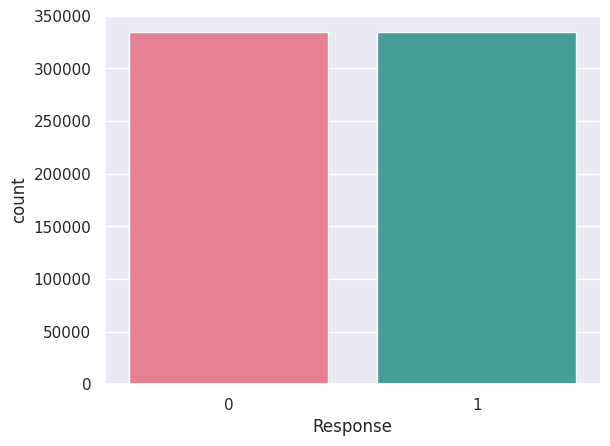

In [53]:
# Initialize the RandomOverSampler
randomsample = RandomOverSampler()

# Resample the dataset
x_new, y_new = randomsample.fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original Dataset shape {}'.format(Counter(y)))
print('Resampled Dataset shape {}'.format(Counter(y_new)))

# Plot the resampled dataset
sns.countplot(x=y_new, palette='husl')

#### spliting of Data into train and test Data

In [54]:
#dividing the Dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


#4. Model Selection
* Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

* Dataset has more than 300k records

* cannot go with SVM Classifier as it takes more time to train as Dataset increase
* Idea is to start selection of models as:

       1.Logistic Regression

       2.Random Forest

       3.XGBClassifier

###  1.Logistic Regression





In [55]:

model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7838068181818182
ROC_AUC Score: 0.8339972753871613


In [56]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61437
           1       0.98      0.70      0.82    139203

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



### ROC Curve


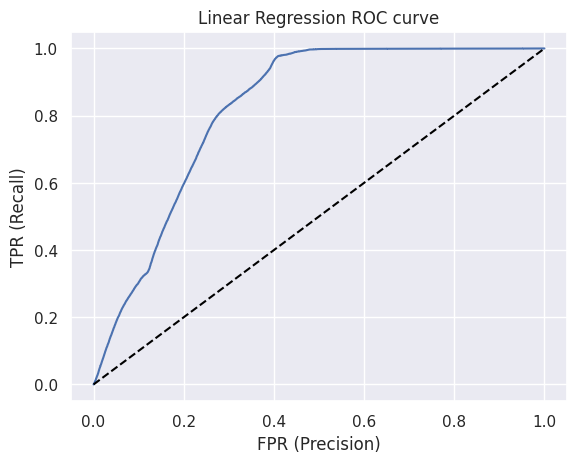

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59194 41134]
 [ 2243 98069]]


<Axes: >

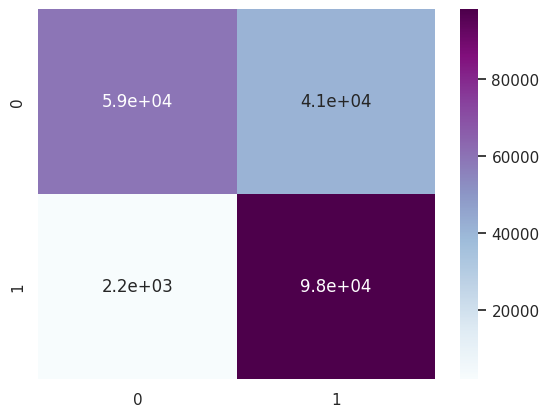

In [58]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

## 2.RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.9442384370015949
ROC_AUC Score: 0.9491687816705586


In [60]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89814
           1       1.00      0.90      0.95    110826

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



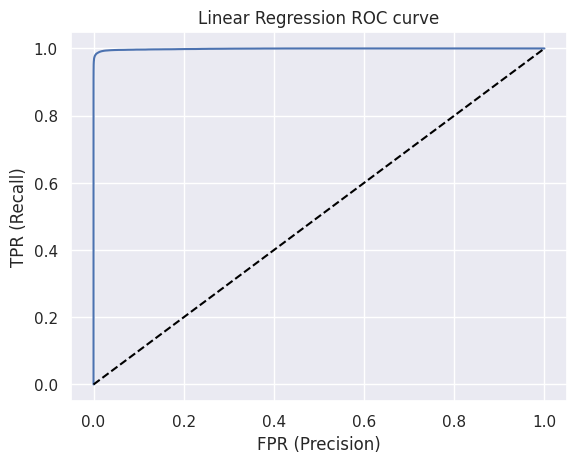

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[89477   337]
 [10851 99975]]


<Axes: >

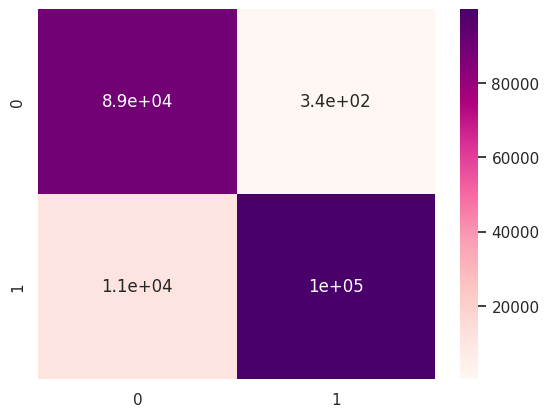

In [62]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## 3. XGBClassifier

In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.8137460127591707
ROC_AUC Score: 0.8351063598548818


In [64]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     74998
           1       0.94      0.75      0.83    125642

    accuracy                           0.81    200640
   macro avg       0.81      0.84      0.81    200640
weighted avg       0.85      0.81      0.82    200640



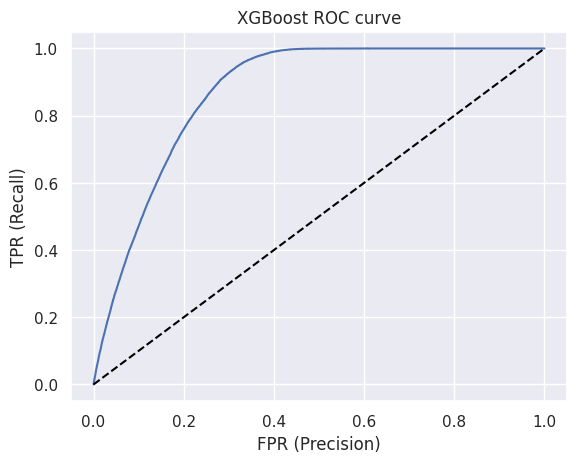

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[68978 31350]
 [ 6020 94292]]


<Axes: >

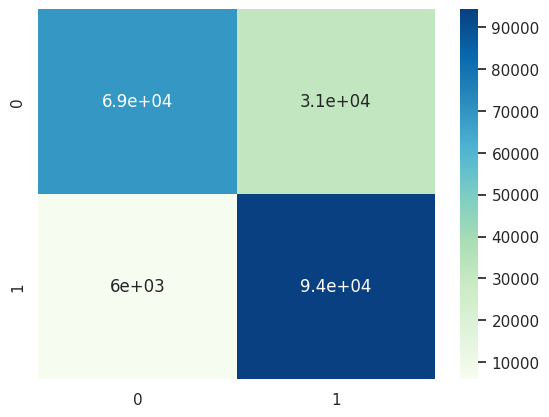

In [66]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## Comparing the model

In [70]:
ind=['Logistic regression','Randomforest','XGBClassifier']
isp={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=isp,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783807,0.977640,0.704503,0.818897,0.833997
Randomforest,0.944238,0.996640,0.902090,0.947011,0.949169
XGBClassifier,0.813746,0.939987,0.750482,0.834612,0.835106


The ML model for the problem statement was created using python with the help of the Dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# Conclusion

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
*  The variable such as Age, Previously_insured,Annual_premium  are more afecting the target variable.
* comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.
